# Laboratorio 5

# Análisis de Sentimientos

### Cristina Bautista 161260
### Andy Castillo 18040
### Marco Fuentes 18188
### Abril Palencia 18198

In [1]:
import numpy as np
import pandas as pd

In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier
from nltk import sent_tokenize, word_tokenize, pos_tag
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk import FreqDist
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/marcofuentes/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/marcofuentes/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
from wordcloud import WordCloud, STOPWORDS

import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
%matplotlib inline

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [5]:
data = pd.read_csv('GrammarandProductReviews.csv')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71044 entries, 0 to 71043
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    71044 non-null  object 
 1   brand                 71044 non-null  object 
 2   categories            71044 non-null  object 
 3   dateAdded             71044 non-null  object 
 4   dateUpdated           71044 non-null  object 
 5   ean                   39065 non-null  object 
 6   keys                  71044 non-null  object 
 7   manufacturer          70903 non-null  object 
 8   manufacturerNumber    70841 non-null  object 
 9   name                  71044 non-null  object 
 10  reviews.date          70977 non-null  object 
 11  reviews.dateAdded     71044 non-null  object 
 12  reviews.dateSeen      71044 non-null  object 
 13  reviews.didPurchase   32158 non-null  object 
 14  reviews.doRecommend   60429 non-null  object 
 15  reviews.id         

### Quitar columnas innecesarias

In [7]:
data = data[['brand','categories','manufacturer', 'name', 'reviews.didPurchase', 'reviews.doRecommend', 'reviews.numHelpful', 'reviews.rating', 'reviews.text', 'reviews.title', 'reviews.username']]

In [8]:
data['reviews.text'].head(20)

0     i love this album. it's very good. more to the...
1     Good flavor. This review was collected as part...
2                                          Good flavor.
3     I read through the reviews on here before look...
4     My husband bought this gel for us. The gel cau...
5     My boyfriend and I bought this to spice things...
6     Bought this earlier today and was excited to c...
7     I bought this product for my husband and I to ...
8     My husband and I bought this for some extra fu...
9     Got as a surprise for my husband there is noth...
10    tried it with my husband and felt no different...
11    Purchased this thinking it would have some sor...
12    Bought this to enhance our time a bit, did abs...
13    I bought this after really liking the his n he...
14    First time purchase of this type of product. M...
15    I bought this and tried this with my wife but ...
16    I bought this product to spice things up with ...
17    I bought this to try to spice things up, b

In [9]:
data.head()

,brand,categories,manufacturer,name,reviews.didPurchase,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.text,reviews.title,reviews.username
0,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),NaN,NaN,0.0,5,i love this album. it's very good. more to the...,Just Awesome,Joshua
1,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,True,NaN,NaN,5,Good flavor. This review was collected as part...,Good,Dorothy W
2,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,True,NaN,NaN,5,Good flavor.,Good,Dorothy W
3,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,False,False,NaN,1,I read through the reviews on here before look...,Disappointed,Rebecca
4,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,False,False,NaN,1,My husband bought this gel for us. The gel cau...,Irritation,Walker557


In [10]:
data['reviews.text'].head(20)

0     i love this album. it's very good. more to the...
1     Good flavor. This review was collected as part...
2                                          Good flavor.
3     I read through the reviews on here before look...
4     My husband bought this gel for us. The gel cau...
5     My boyfriend and I bought this to spice things...
6     Bought this earlier today and was excited to c...
7     I bought this product for my husband and I to ...
8     My husband and I bought this for some extra fu...
9     Got as a surprise for my husband there is noth...
10    tried it with my husband and felt no different...
11    Purchased this thinking it would have some sor...
12    Bought this to enhance our time a bit, did abs...
13    I bought this after really liking the his n he...
14    First time purchase of this type of product. M...
15    I bought this and tried this with my wife but ...
16    I bought this product to spice things up with ...
17    I bought this to try to spice things up, b

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71044 entries, 0 to 71043
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   brand                71044 non-null  object 
 1   categories           71044 non-null  object 
 2   manufacturer         70903 non-null  object 
 3   name                 71044 non-null  object 
 4   reviews.didPurchase  32158 non-null  object 
 5   reviews.doRecommend  60429 non-null  object 
 6   reviews.numHelpful   32508 non-null  float64
 7   reviews.rating       71044 non-null  int64  
 8   reviews.text         71008 non-null  object 
 9   reviews.title        70568 non-null  object 
 10  reviews.username     70948 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 6.0+ MB


## Preprocesamiento

### Texto a minusculas

In [12]:
data['brand'] = data['brand'].str.lower()
data['categories'] = data['categories'].str.lower()
data['manufacturer'] = data['manufacturer'].str.lower()
data['name'] = data['name'].str.lower()
data['reviews.text'] = data['reviews.text'].str.lower()
data['reviews.title'] = data['reviews.title'].str.lower()
data['reviews.username'] = data['reviews.username'].str.lower()

### Quitar URL

In [13]:
data['brand'] = data['brand'].str.replace(r'http\S+', ' ')
data['categories'] = data['categories'].str.replace(r'http\S+', ' ')
data['manufacturer'] = data['manufacturer'].str.replace(r'http\S+', ' ')
data['name'] = data['name'].str.replace(r'http\S+', ' ')
data['reviews.text'] = data['reviews.text'].str.replace(r'http\S+', ' ')
data['reviews.title'] = data['reviews.title'].str.replace(r'http\S+', ' ')
data['reviews.username'] = data['reviews.username'].str.replace(r'http\S+', ' ')

<ipython-input-13-6d5f99569204>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['brand'] = data['brand'].str.replace(r'http\S+', ' ')
<ipython-input-13-6d5f99569204>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['categories'] = data['categories'].str.replace(r'http\S+', ' ')
<ipython-input-13-6d5f99569204>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  data['manufacturer'] = data['manufacturer'].str.replace(r'http\S+', ' ')
<ipython-input-13-6d5f99569204>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  data['name'] = data['name'].str.replace(r'http\S+', ' ')
<ipython-input-13-6d5f99569204>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  data['reviews.text'] = data['reviews.text'].str.replace(r'http\S+', ' ')
<ipython-input

### Quitar caracteres especiales

In [14]:
data['brand'] = data['brand'].str.replace(r'[^A-Za-z\s]+', ' ')
data['categories'] = data['categories'].str.replace(r'[^A-Za-z]+', ' ')
data['manufacturer'] = data['manufacturer'].str.replace(r'[^A-Za-z]+', ' ')
data['name'] = data['name'].str.replace(r'[^A-Za-z\s]+', ' ')
data['reviews.text'] = data['reviews.text'].str.replace(r'[^A-Za-z]+', ' ')
data['reviews.title'] = data['reviews.title'].str.replace(r'[^A-Za-z]+', ' ')
data['reviews.username'] = data['reviews.username'].str.replace(r'[^A-Za-z]+', ' ')

<ipython-input-14-4a2c5c0edbed>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['brand'] = data['brand'].str.replace(r'[^A-Za-z\s]+', ' ')
<ipython-input-14-4a2c5c0edbed>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['categories'] = data['categories'].str.replace(r'[^A-Za-z]+', ' ')
<ipython-input-14-4a2c5c0edbed>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  data['manufacturer'] = data['manufacturer'].str.replace(r'[^A-Za-z]+', ' ')
<ipython-input-14-4a2c5c0edbed>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  data['name'] = data['name'].str.replace(r'[^A-Za-z\s]+', ' ')
<ipython-input-14-4a2c5c0edbed>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  data['reviews.text'] = data['reviews.text'].str.replace(r'[^A-Za-z]+', 

In [15]:
data.head()

,brand,categories,manufacturer,name,reviews.didPurchase,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.text,reviews.title,reviews.username
0,universal music,movies music books music r b movies tv movie b...,universal music group cash money,pink friday roman reloaded re up w dvd,NaN,NaN,0.0,5,i love this album it s very good more to the h...,just awesome,joshua
1,lundberg,food packaged foods snacks crackers snacks coo...,lundberg,lundberg organic cinnamon toast rice cakes,True,NaN,NaN,5,good flavor this review was collected as part ...,good,dorothy w
2,lundberg,food packaged foods snacks crackers snacks coo...,lundberg,lundberg organic cinnamon toast rice cakes,True,NaN,NaN,5,good flavor,good,dorothy w
3,k y,personal care medicine cabinet lubricant sperm...,k y,k y love sensuality pleasure gel,False,False,NaN,1,i read through the reviews on here before look...,disappointed,rebecca
4,k y,personal care medicine cabinet lubricant sperm...,k y,k y love sensuality pleasure gel,False,False,NaN,1,my husband bought this gel for us the gel caus...,irritation,walker


### Tokenization

In [16]:
tokenizer = RegexpTokenizer(r'\w+')

data['brand'] = data['brand'].apply(lambda x: tokenizer.tokenize(x))
data['categories'] = data['categories'].apply(lambda x: tokenizer.tokenize(x))
data['manufacturer'] = data['manufacturer'].apply(lambda x: tokenizer.tokenize(str(x)))
data['name'] = data['name'].apply(lambda x: tokenizer.tokenize(x))
data['reviews.text'] = data['reviews.text'].apply(lambda x: tokenizer.tokenize(str(x)))
data['reviews.title'] = data['reviews.title'].apply(lambda x: tokenizer.tokenize(str(x)))
data['reviews.username'] = data['reviews.username'].apply(lambda x: tokenizer.tokenize(str(x)))

### Stopwords

In [17]:
stopwords = stopwords.words('english')

In [18]:
data['reviews.text'] = data['reviews.text'].apply(lambda y: [w for w in y if w not in stopwords])
data['reviews.title'] = data['reviews.title'].apply(lambda y: [w for w in y if w not in stopwords])

In [19]:
data.head()

,brand,categories,manufacturer,name,reviews.didPurchase,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.text,reviews.title,reviews.username
0,"[universal, music]","[movies, music, books, music, r, b, movies, tv...","[universal, music, group, cash, money]","[pink, friday, roman, reloaded, re, up, w, dvd]",NaN,NaN,0.0,5,"[love, album, good, hip, hop, side, current, p...",[awesome],[joshua]
1,[lundberg],"[food, packaged, foods, snacks, crackers, snac...",[lundberg],"[lundberg, organic, cinnamon, toast, rice, cakes]",True,NaN,NaN,5,"[good, flavor, review, collected, part, promot...",[good],"[dorothy, w]"
2,[lundberg],"[food, packaged, foods, snacks, crackers, snac...",[lundberg],"[lundberg, organic, cinnamon, toast, rice, cakes]",True,NaN,NaN,5,"[good, flavor]",[good],"[dorothy, w]"
3,"[k, y]","[personal, care, medicine, cabinet, lubricant,...","[k, y]","[k, y, love, sensuality, pleasure, gel]",False,False,NaN,1,"[read, reviews, looking, buying, one, couples,...",[disappointed],[rebecca]
4,"[k, y]","[personal, care, medicine, cabinet, lubricant,...","[k, y]","[k, y, love, sensuality, pleasure, gel]",False,False,NaN,1,"[husband, bought, gel, us, gel, caused, irrita...",[irritation],[walker]


In [20]:
stemmer = PorterStemmer()
def word_stemmer(data): 
    stem_text = " ".join([stemmer.stem(i) for i in data])
    return stem_text

In [21]:
data['reviews.text'].apply(lambda x: word_stemmer(x))

0        love album good hip hop side current pop sound...
1                   good flavor review collect part promot
2                                              good flavor
3        read review look buy one coupl lubric ultim di...
4        husband bought gel us gel caus irrit felt like...
                               ...                        
71039    deal dri eye sensit product eye clinic suggest...
71040              great stuff help keep contact moist day
71041                                          right price
71042    pleas scarf arriv multipl reason print color b...
71043    excel album make holiday better give nice chri...
Name: reviews.text, Length: 71044, dtype: object

In [22]:
data['reviews.text'] = data['reviews.text'].apply(lambda x: word_stemmer(x))
df = data['reviews.text'].str.split(expand=True).stack().value_counts()

## Analisis Exploratorio

<AxesSubplot:>

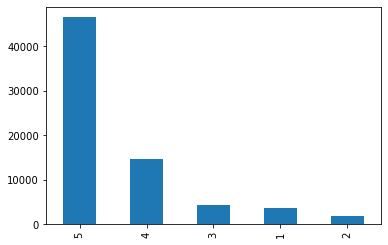

In [23]:
review_rate = data['reviews.rating'].value_counts()
review_rate.plot.bar()

Grafica de frecuencia para los diferentes ratings de reviews

In [24]:
all_text = data['reviews.text'].str.split(' ')
text_data = [" ".join(text) for text in all_text]
final_text = " ".join(text_data)

wordcloud_text = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(final_text)

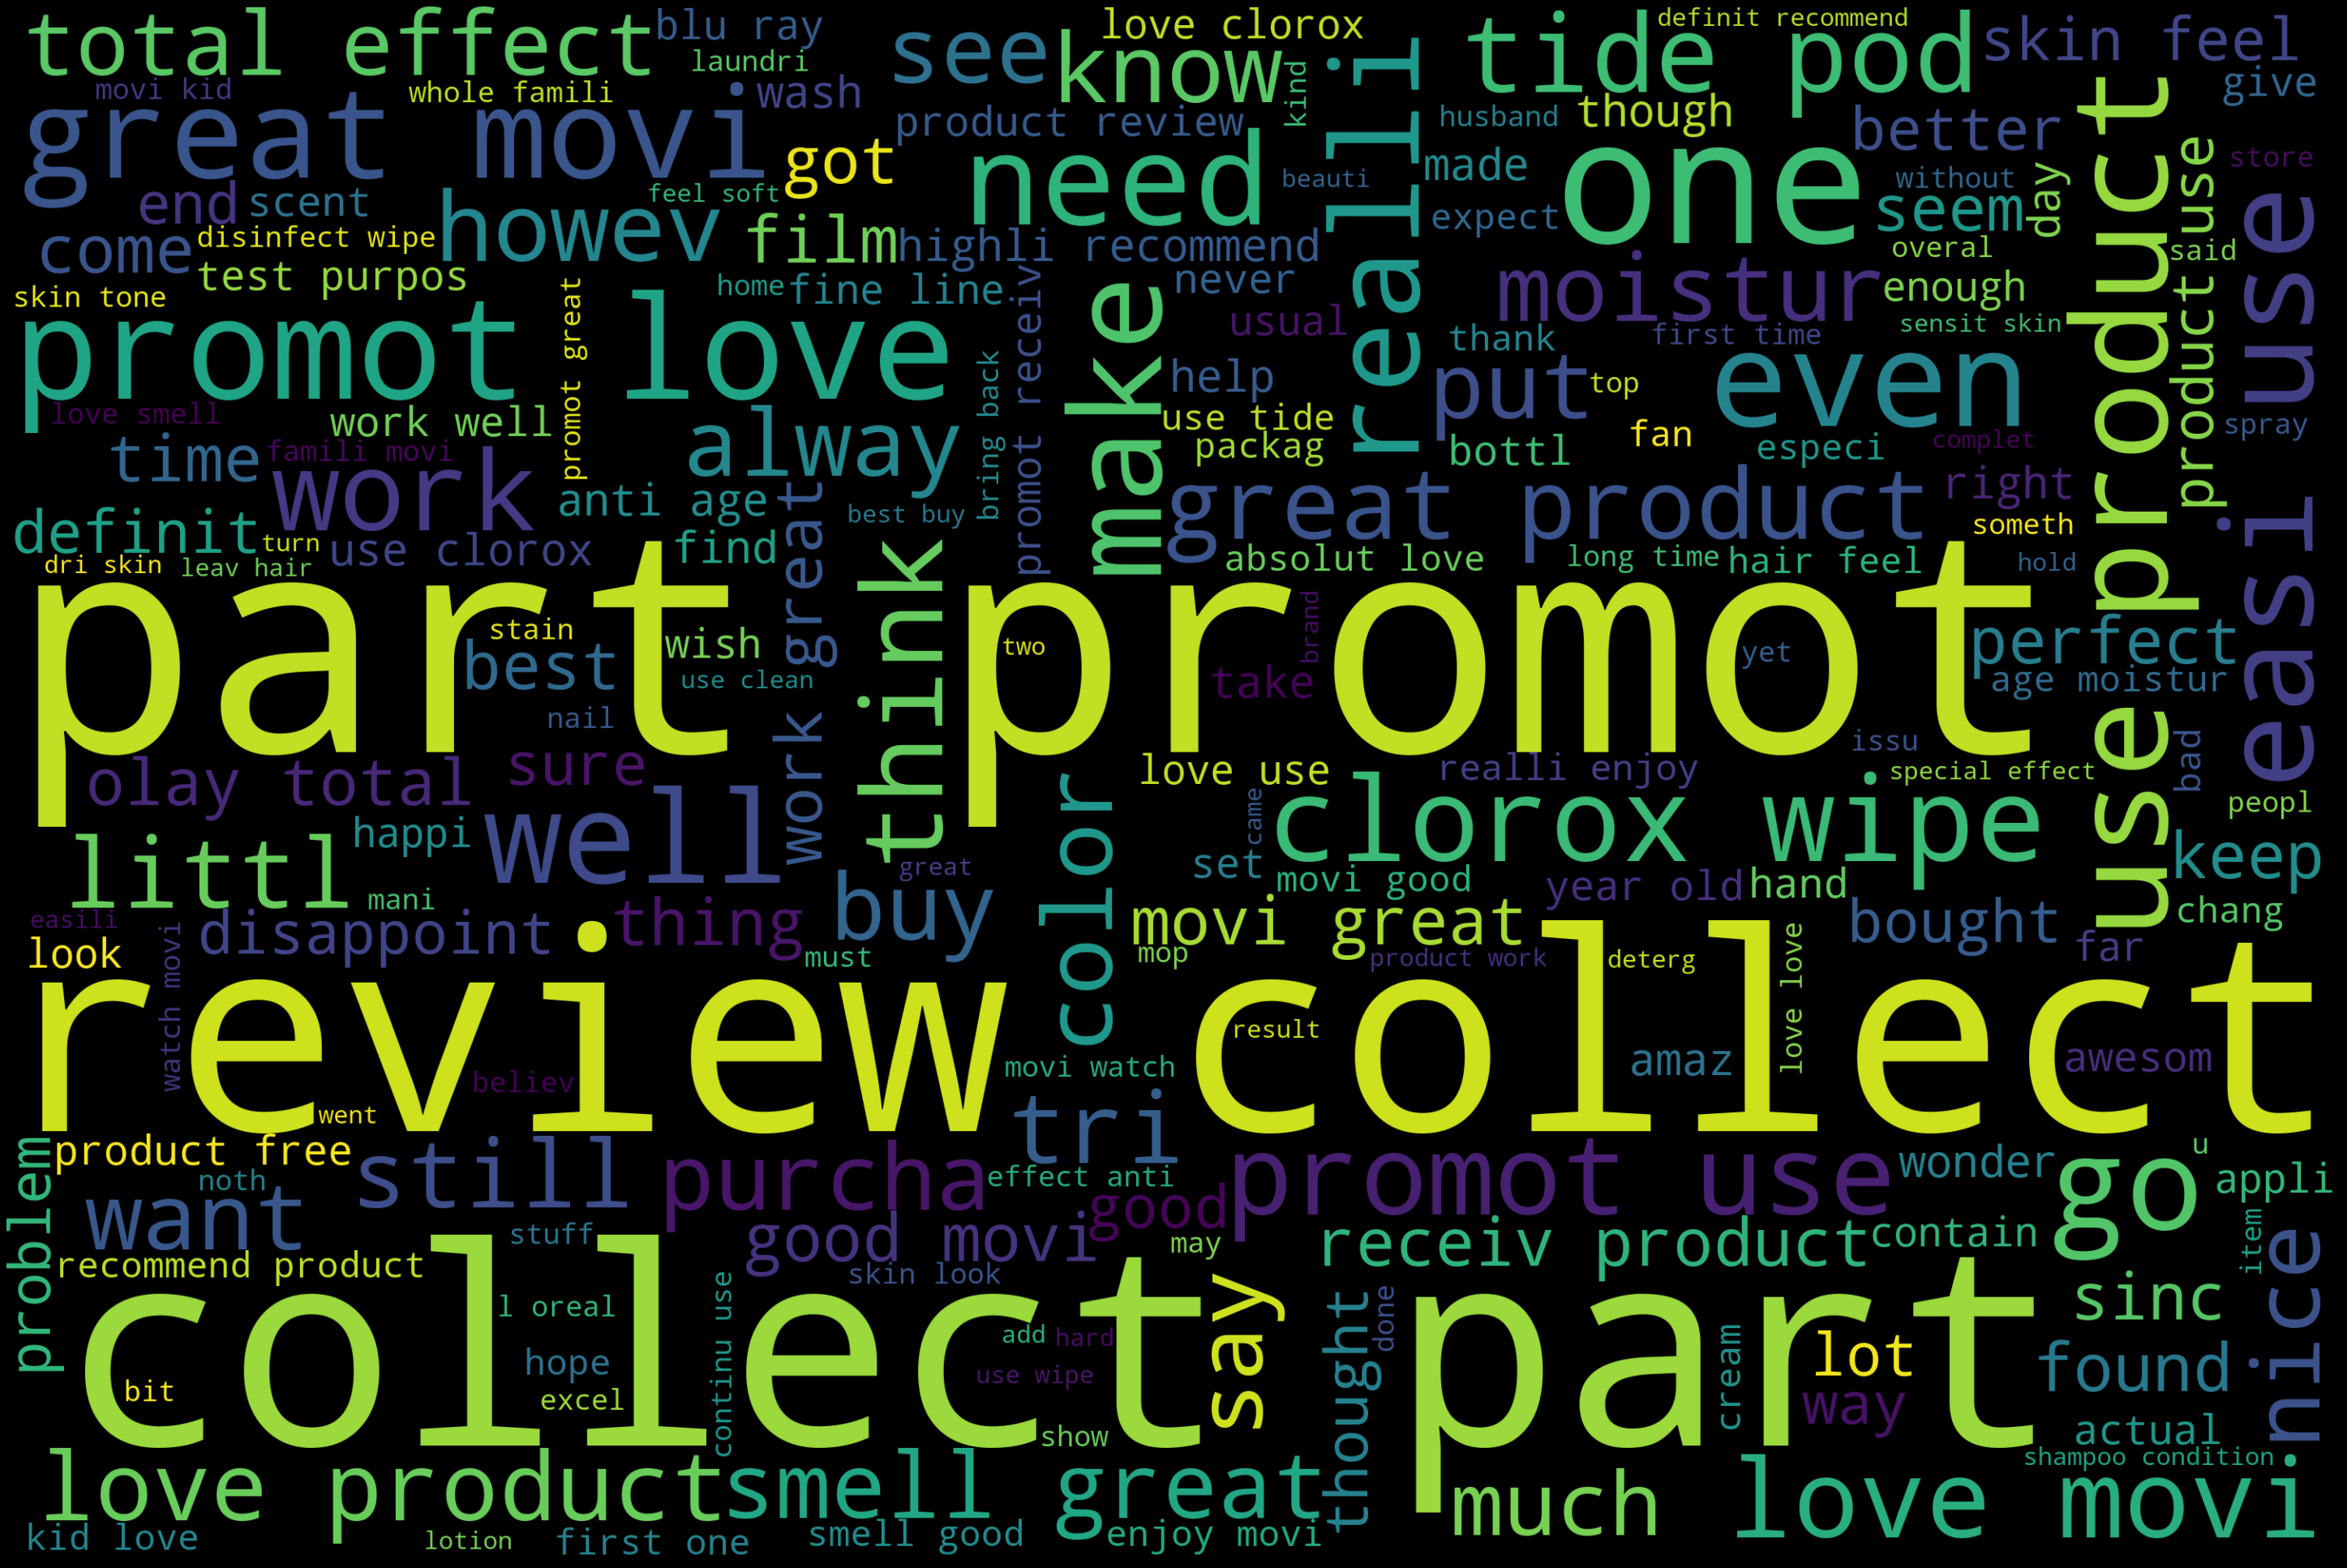

In [25]:
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud_text, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## Modelo

In [27]:
!pip3 install textblob
from textblob import TextBlob

     |████████████████████████████████| 636 kB 1.3 MB/s eta 0:00:01


In [28]:
def get_sentiment(text): 
    analysis = TextBlob(text) 
    # set sentiment 
    if analysis.sentiment.polarity > 0: 
        return 'positive'
    elif analysis.sentiment.polarity == 0: 
        return 'neutral'
    else: 
        return 'negative'

In [29]:
sentiments = data['reviews.text'].apply(lambda x: get_sentiment(x))

<AxesSubplot:>

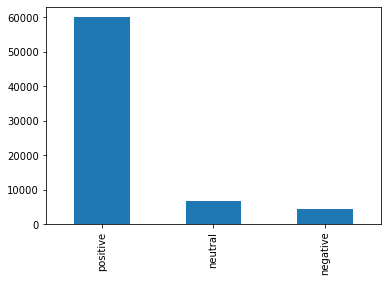

In [30]:
freq_sentiments = sentiments.value_counts()
freq_sentiments.plot.bar()

In [31]:
data['sentiment'] = sentiments
data[['reviews.text', 'sentiment']]

,reviews.text,sentiment
0,love album good hip hop side current pop sound...,positive
1,good flavor review collect part promot,positive
2,good flavor,positive
3,read review look buy one coupl lubric ultim di...,positive
4,husband bought gel us gel caus irrit felt like...,neutral
...,...,...
71039,deal dri eye sensit product eye clinic suggest...,negative
71040,great stuff help keep contact moist day,positive
71041,right price,positive
71042,pleas scarf arriv multipl reason print color b...,positive


#### Cuáles son los 10 productos de mejor calidad dado su review?

In [32]:
most_positive = data[(data['reviews.rating'] == 5) & (data['sentiment'] == 'positive')]
freq_positive = most_positive['name'].value_counts()
cont = 1
for i in freq_positive.index:
    if cont < 11:
        print(cont,' '.join(i))
        cont+=1

1 clorox disinfecting wipes value pack scented ct total
2 the secret life of pets k uhd blu ray digital
3 tide original liquid laundry detergent oz
4 the jungle book blu ray dvd digital
5 clorox disinfecting bathroom cleaner
6 godzilla d includes digital copy ultraviolet d d blu ray dvd
7 l or al paris elvive extraordinary clay rebalancing conditioner fl oz
8 l oreal paris revitalift triple power deep acting moisturizer
9 independence day resurgence k uhd blu ray digital
10 tide pods detergent botanical rain ct


#### Cuáles son los 10 productos de menor calidad dado su review?

In [33]:
most_negative = data[(data['reviews.rating'] == 1) & (data['sentiment'] == 'negative')]
freq_negative = most_negative['name'].value_counts()
cont = 1
for i in freq_negative.index:
    if cont < 11:
        print(cont,' '.join(i))
        cont+=1

1 rubbermaid reveal spray mop
2 tide original liquid laundry detergent oz
3 nexxus exxtra gel style creation sculptor
4 maybelline eye studio master duo glossy liquid liner black lacquer
5 independence day resurgence k uhd blu ray digital
6 olay total effects daily moisturizer in anti aging oz
7 clear scalp hair therapy total care nourishing shampoo
8 maybelline eye studio color plush shadow quad gutsy green
9 aveeno baby continuous protection lotion sunscreen with broad spectrum spf oz
10 sausage party k uhd digital


#### Cuáles son los usuarios que dan la mayor cantidad de reviews a distintos productos?

In [34]:
data['name'] = data['name'].apply(lambda x: ' '.join(map(str, x)))

In [35]:
names = data.drop_duplicates(subset="name")

In [36]:
most_comments = names['reviews.username'].value_counts()
cont = 1
for i in most_comments.index:
    if cont < 11:
        print(cont,' '.join(i))
        cont+=1

1 an anonymous customer
2 donna
3 nan
4 lisa
5 mike
6 erica
7 sandy
8 susan
9 paula
10 unhappy


#### Cuáles son los usuarios que más reviews negativos y positivos dan en promedio?

#### Positivos

In [37]:
most_positive_comments = data[(data['sentiment'] == 'positive')]
user_most = most_positive_comments['reviews.username'].value_counts()

In [38]:
cont = 1
for i in user_most.index:
    if cont < 11:
        if len(i) > 0:
            print(cont,' '.join(i))
            cont+=1

1 an anonymous customer
2 chris
3 mike
4 anonymous
5 nan
6 john
7 lisa
8 jess
9 dave
10 james


#### Negativos

In [39]:
most_negative_comments = data[(data['sentiment'] == 'negative')]
user_most = most_negative_comments['reviews.username'].value_counts()

In [40]:
cont = 1
for i in user_most.index:
    if cont < 11:
        if len(i) > 0:
            print(cont,' '.join(i))
            cont+=1

1 an anonymous customer
2 byamazon customer
3 chris
4 anonymous
5 mike
6 carol
7 karen
8 mary
9 steve
10 melissa


#### Cuáles son los productores que tienen productos de mejor calidad?

In [41]:
mostBrand_positive = data[(data['reviews.rating'] == 5) & (data['sentiment'] == 'negative')]
freq_positive = mostBrand_positive['brand'].value_counts()
cont = 1
for i in freq_positive.index:
    if cont < 11:
        print(cont,' '.join(i))
        cont+=1

1 clorox
2 sony pictures
3 tide
4 l oreal paris
5 quilted northern
6 olay
7 universal home video
8 lemi shine
9 fox
10 warner home video


#### Cuáles son los productores que tienen productos de peor calidad?

In [42]:
mostBrand_negative = data[(data['reviews.rating'] == 1) & (data['sentiment'] == 'negative')]
freq_negative = mostBrand_negative['brand'].value_counts()
cont = 1
for i in freq_negative.index:
    if cont < 11:
        print(cont,' '.join(i))
        cont+=1

1 rubbermaid
2 tide
3 nexxus
4 maybelline
5 fox
6 l oreal paris
7 olay
8 clear scalp hair therapy
9 sony pictures
10 aveeno


## 7
#### Imagine que usted es analista de negocios y que está realizando este análisis para el productor que tiene más productos con malos reviews ¿Qué le propondría a esta empresa para mejorar sus productos? Puede basar su análisis en la frecuencia de las palabras de las opiniones.

In [106]:
most_negative = data[(data['reviews.rating'] == 1) & (data['sentiment'] == 'negative')]
freq_negative = most_negative['name'].value_counts()

In [59]:
negative_data = data[data['sentiment']== 'negative']

In [60]:
negative_data.head()

,brand,categories,manufacturer,name,reviews.didPurchase,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.text,reviews.title,reviews.username,sentiment
6,"[k, y]","[personal, care, medicine, cabinet, lubricant,...","[k, y]",k y love sensuality pleasure gel,False,False,NaN,1,bought earlier today excit check base product ...,[disappointing],[raeanne],negative
22,"[k, y]","[personal, care, medicine, cabinet, lubricant,...","[k, y]",k y love sensuality pleasure gel,False,True,NaN,4,use time stay bit sticki bad better product,[job],[jo],negative
41,"[johnson, s]","[personal, care, baby, care, baby, bubble, bat...","[johnson, s]",johnson s baby bubble bath and wash oz,False,False,NaN,1,month old babi got extrem irrit product use le...,"[bad, reaction]","[an, anonymous, customer]",negative
43,"[johnson, s]","[personal, care, baby, care, baby, bubble, bat...","[johnson, s]",johnson s baby bubble bath and wash oz,False,True,0.0,3,would think conveni bubbl bath wash contain me...,"[bubble, bath]",[gardenbunny],negative
63,[olay],"[personal, care, skin, care, anti, aging, beau...","[p, g]",olay regenerist deep hydration regenerating cream,False,False,NaN,1,olay work overli dri skin found anyth work ski...,"[product, smells, ok]",[piggyboy],negative


In [91]:
list_words = []
frequencies = {}
for index, item in negative_data.iterrows():
#     print(index)
#     print(item['reviews.text'])
    list_words.extend(item['reviews.text'].split(' '))
#     break
for word in list_words:
    if word in frequencies:
        frequencies[word] += 1
    else:
        frequencies[word] = 1
        


In [92]:
print(len(frequencies))

5888


In [95]:
cont = 0
for i in frequencies:
    print(i, frequencies[i])
    cont += 1
    if cont > 15:
        break

bought 341
earlier 4
today 35
excit 81
check 20
base 212
product 1682
descript 13
expect 106
someth 136
like 1082
regular 45
ky 1
fan 103
left 137
littl 300


In [107]:
sort_orders = sorted(frequencies.items(), key=lambda x: x[1], reverse=True)
for item in sort_orders[:25]:
    print(item, get_sentiment(item[0]))

('use', 2293) neutral
('product', 1682) neutral
('review', 1085) neutral
('like', 1082) neutral
('part', 1006) neutral
('collect', 966) neutral
('promot', 898) neutral
('movi', 864) neutral
('one', 823) neutral
('would', 655) neutral
('get', 655) neutral
('time', 652) neutral
('bad', 623) negative
('skin', 611) neutral
('work', 601) neutral
('hair', 595) neutral
('tri', 508) neutral
('look', 508) neutral
('make', 500) neutral
('year', 484) neutral
('realli', 466) neutral
('day', 453) neutral
('well', 422) neutral
('buy', 395) neutral
('go', 384) neutral


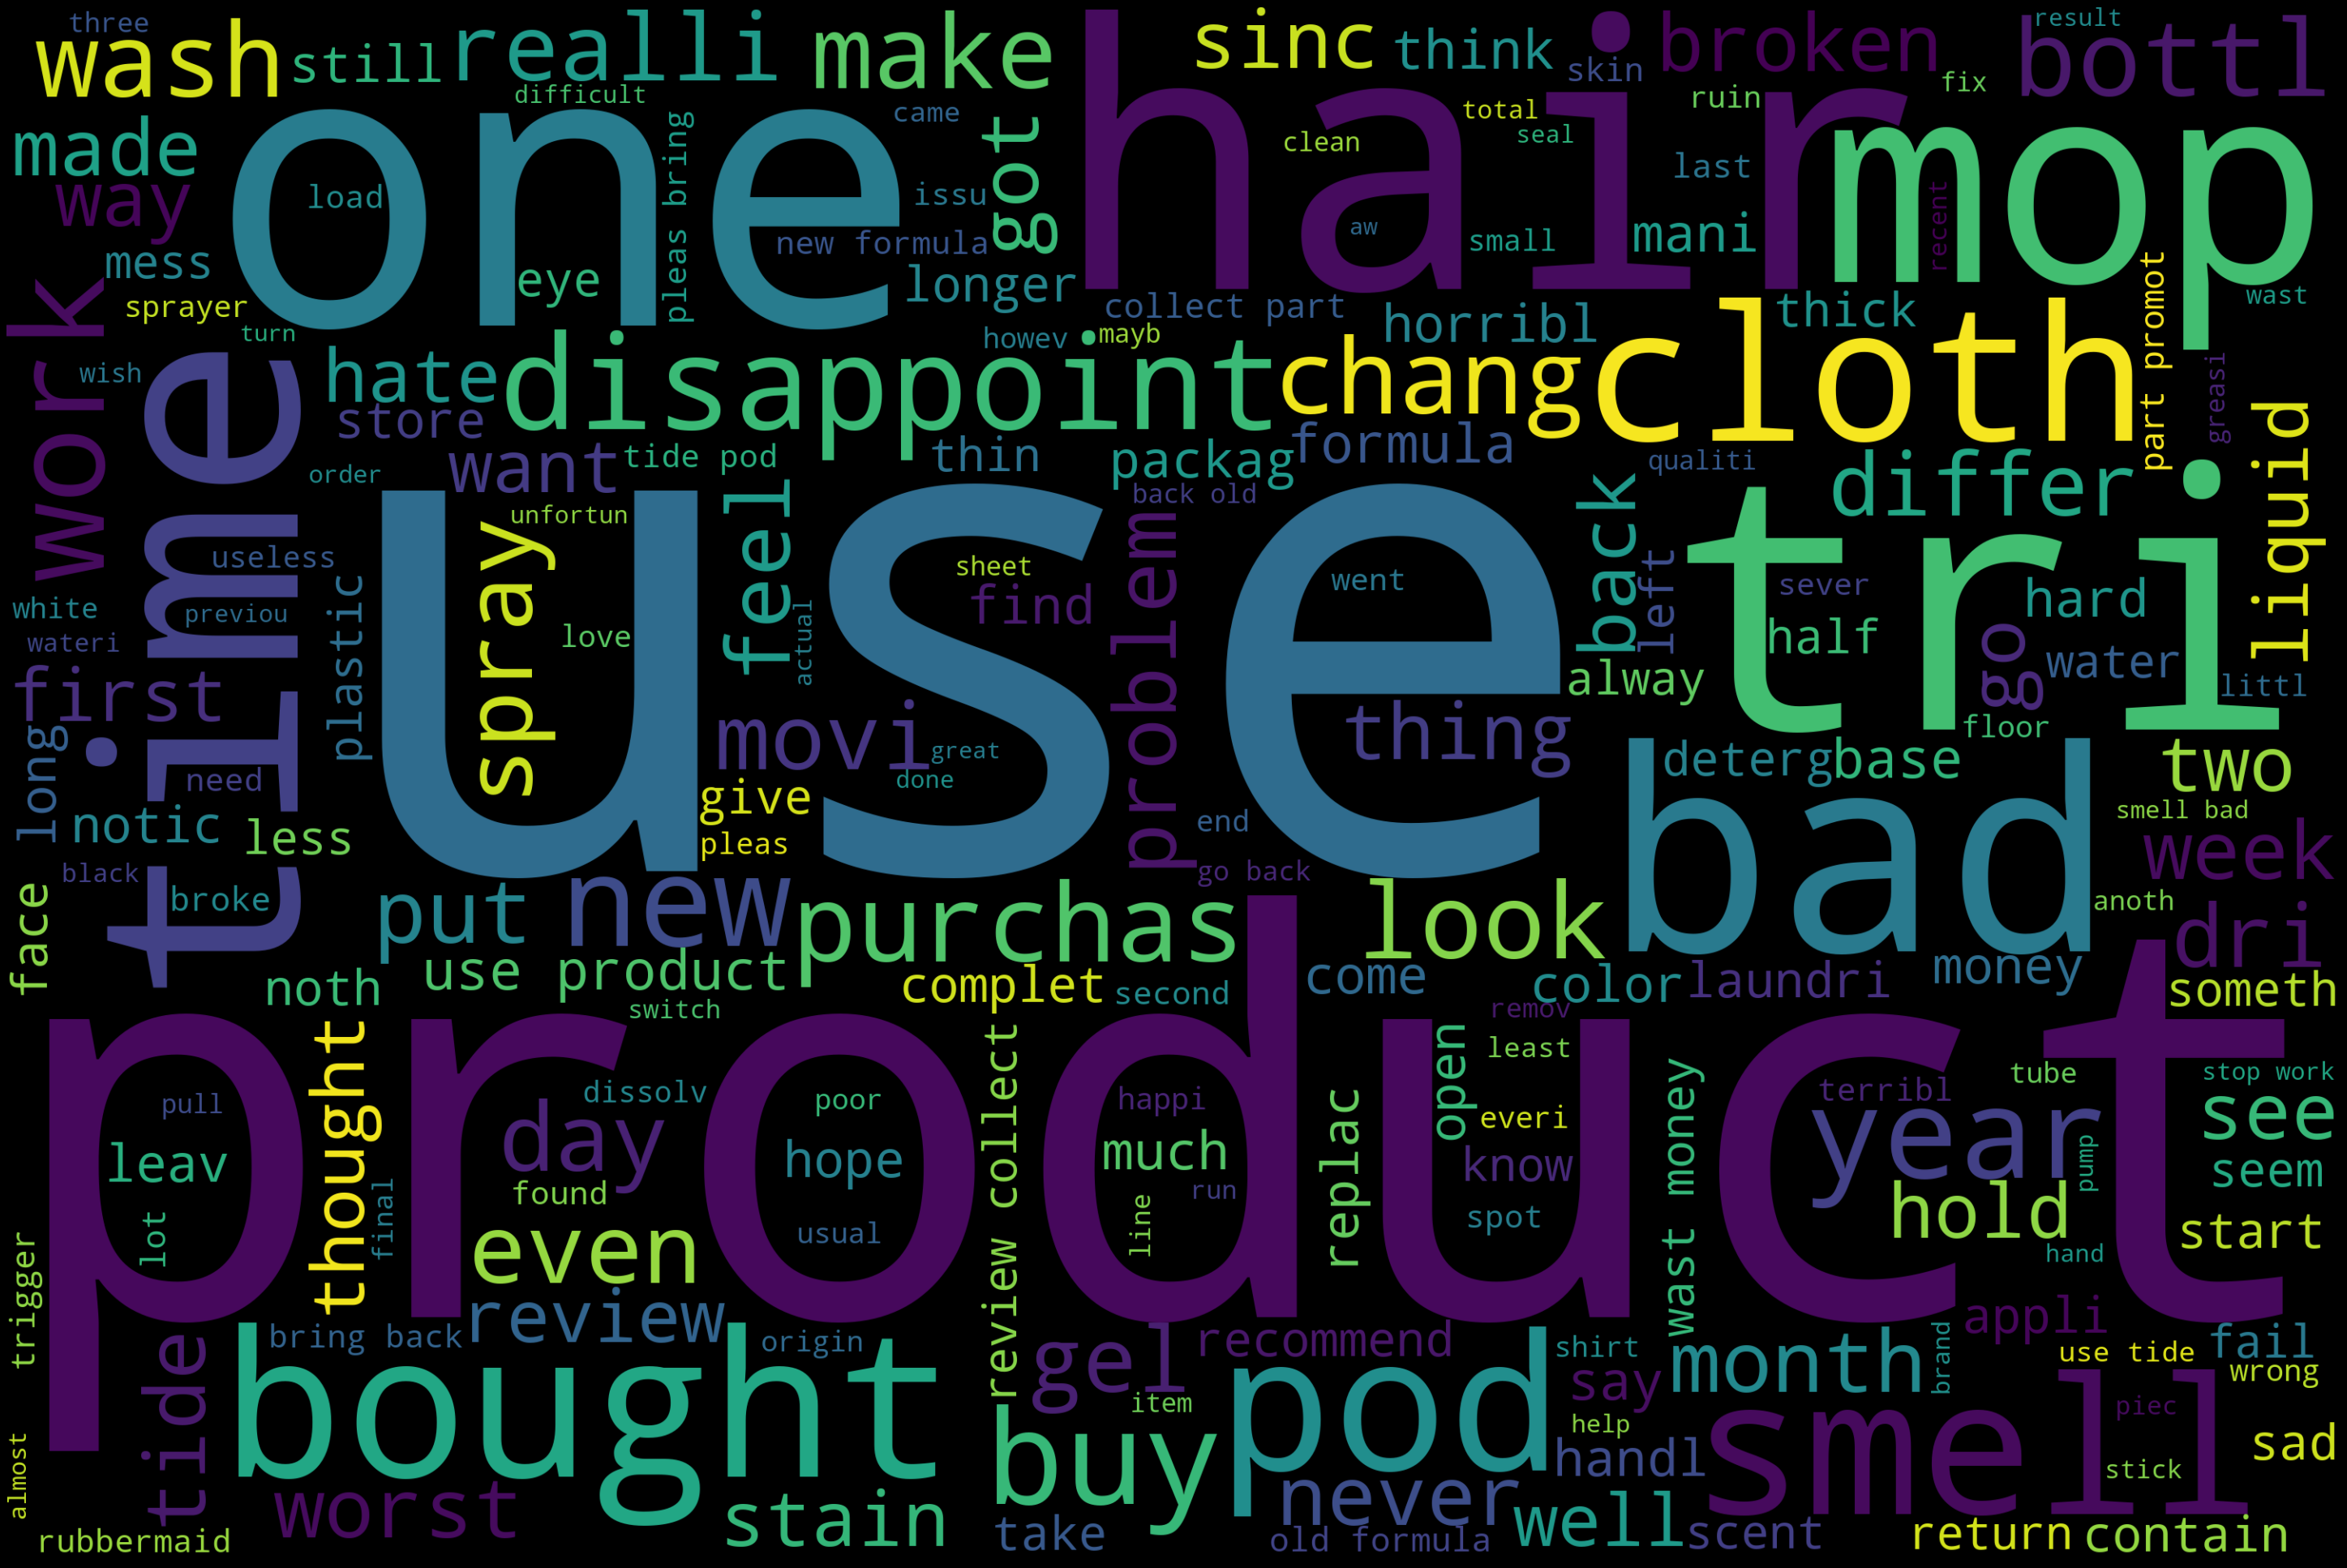

In [110]:
all_text = most_negative['reviews.text'].str.split(' ')
text_data = [" ".join(text) for text in all_text]
final_text = " ".join(text_data)

wordcloud_text = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(final_text)


fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud_text, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## Recomendación

Tomando en cuenta el análisis previo y la nube de palabras de arriba, creo que seria una buena idea que la empresa mejore el precio, presenteacion, limpieza y el olor de sus productos.

Analizando la frecuencia de las palabras de las malas _reviews_, podemos darnos cuenta que algunas de las mas frecuentes son `disappoint`, `smell`, `wash`, y `look`. Todo esto nos sugiere que los productos que les estan llegando a los usuarios no estan pasando por todas las pruebas de calidad necesarias para asegurar su buena presentacion.

Es importante notar que no hay palabras que hagan alusion a un mal *producto*, solo a una mala impresión o presentación del mismo. Esto es util porque tratar de implementar mejoras en la calidad del producto en sí seria una pérdida de recursos.
